In [4]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import numpy as np

In [5]:
def E_feld(x, y, z, t):
    #Wave-vector
    k = 1.
    #Vector d components
    dx = 1.
    dy = 1.
    dz = 1.
    #frequency
    omega = 2*np.pi
    #calculation of |r| 
    r = np.sqrt(x**2+y**2+z**2)
    #calculation of grad(Phi)
    grad_phi = k**2/(4*np.pi*8.8e-12)*(1/r)*np.cos(omega*t-k*r)
    #calculation of d/dt(A)
    time_der_A = 1.256e-6/(4*np.pi)*omega**2/r*np.cos(omega*t-k*r)
    #Multiplikation with basis-vectors of x,y,z with same "length" dimension (np.ones_like(x,y,z) and with vector d)
    return (NORM_COEF*(-grad_phi-time_der_A))*(np.ones_like(x)*dx,np.ones_like(y)*dy,np.ones_like(z)*dz)
NORM_COEF = 9e-11

<IPython.core.display.Javascript object>


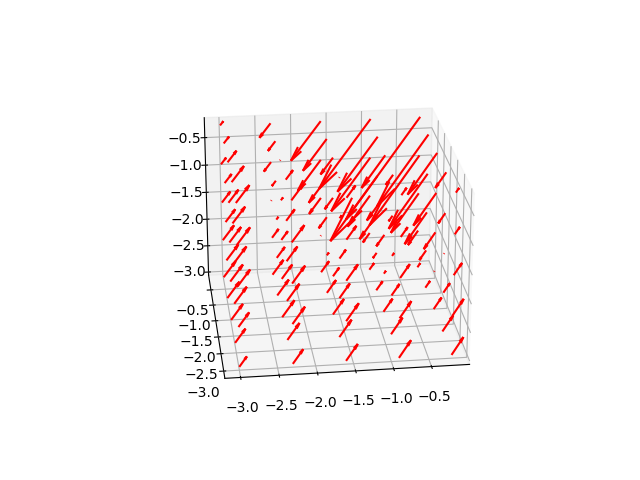

(3, 5, 5, 5)


In [7]:
%matplotlib notebook
fig = plt.figure()
#selection 3d mode for plot
ax = fig.gca(projection='3d')
#generating meshgrid of points for 
x, y, z = np.meshgrid(np.arange(-3., 0., .7),
                      np.arange(-3., 0., .7),
                      np.arange(-3, 0., .7))
print( E_feld(x, y, z, 2.).shape)
u, v, w = E_feld(x, y, z, 5.2)


#print(M[1][1][1])
ax.quiver(x, y, z, u, v, w, length=1., color = 'red', normalize=False)

plt.show()

<IPython.core.display.Javascript object>


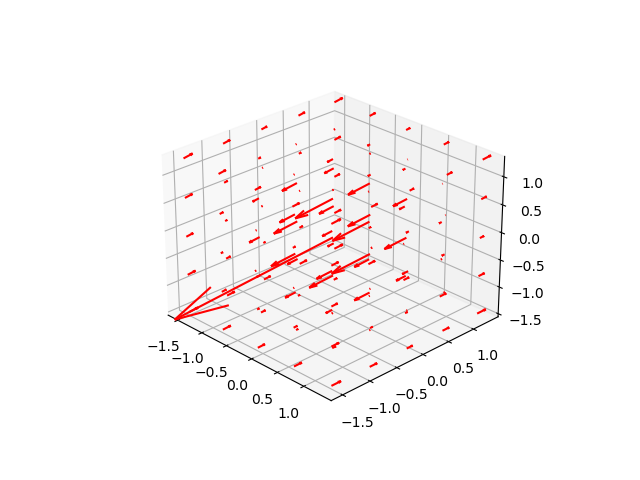

In [13]:
%matplotlib notebook
fig = plt.figure()
NORM_COEF = 6e-11
ax = fig.gca(projection='3d')

x, y, z = np.meshgrid(np.arange(-1.5, 1.5, .7),
                      np.arange(-1.5, 1.5, .7),
                      np.arange(-1.5, 1.5, .7))

u, v, w = E_feld(x, y, z, 5.)
ax.quiver(x, y, z, u, v, w, color = 'r', length=.5, normalize=False)


plt.show()

<IPython.core.display.Javascript object>


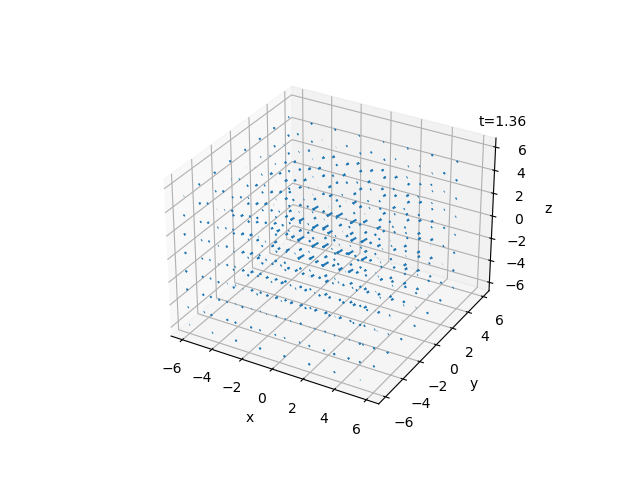

In [15]:
%matplotlib notebook
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib.animation import FuncAnimation, writers
num_frames = 40

fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))
#fig.set_size_inches(23.53, 13.24, True)

x, y, z = np.meshgrid(np.arange(-6., 6., 1.6),
                      np.arange(-6., 6., 1.6),
                      np.arange(-6., 6., 1.6))

def get_field(t):
    u, v, w = E_feld(x, y, z, t)
    return x, y,z,u,v,w

quiver = ax.quiver(*get_field(0))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
q = ax.text(6,6, 8, 't=0')
ax.set_xlim(-6.5, 6.5)
ax.set_ylim(-6.5, 6.5)
ax.set_zlim(-6.5, 6.5)

def update(time):
    global quiver
    quiver.remove()
    quiver = ax.quiver(*get_field(time))
    q.set_text('t=%.2f' % time)
length_sec = 2
ani = FuncAnimation(fig, update, frames=np.linspace(0,2,60*length_sec), interval=16.67)
plt.show()
#dpi = 163.18
#writer = writers['ffmpeg'](fps=60)
#ani.save('4k@60fps_final_final.mp4',writer=writer,dpi=dpi)
